###### Feature Description
<table>
<tr><th>Feature Name</th><th>Definition</th></tr>
<tr><td>Pregnencies</td><td> Number of times pregnent </td></tr>
<tr><td>Glucose</td> <td>Plasma glucose concentration a 2 hours in an oral 
glucose tolerance test</td></tr>
<tr><td>Blood Pressure </td><td>Diastolic blood pressure (mm Hg)</td></tr>
<tr><td>Skin Thickness </td><td>Triceps skin fold thickness (mm) </td></tr>
<tr><td>Insulin </td><td>2-Hour serum insulin (mu U/ml)</td></tr>
<tr><td>BMI </td><td>Body Mass Index</td></tr>
<tr><td>DiabetesPedigreeFunction </td><td>Values Computed based on Diabetes pedigree function</td></tr>
<tr><td>Age </td><td>Age (years)</td></tr>
<tr><td>Outcome</td><td>0 or 1</td></tr>
</table>

###### <ol>
<li>Read the dataset 'diabetes.csv'</li>
<li>Remove the null values if any</li>
<li>Represent Outcome count on a Countplot and Outcome percentage on a pie chart</li>
<li>Represent Glucose vs Blood Pressure on a scatterchart based on Outcome</li>
<li>Represent Blood Pressure vs Insulin on a scatterchart based on Outcome</li>
<li>Represent SkinThickness vs BMI on a scatterchart based on Outcome</li>
<li>Replace all the 0 values present in Glucose, BloodPressure, SkinThickness, Insulin and  BMI columns with their mean respectively</li>
<li>Considering all the columns as independent features and the 'Outcome' column as dependent feature, split the dataset into training and testing dataset with test size 25%</li>
<li>Apply Decision Tree classifier and predict the 'Outcome' column for testing dataset</li>
<li>Find accuracy score for training and testing dataset</li>
<li>Generate confusion matrix</li>
<li>Generate Classification Report</li>
<li>Apply Random Forest classifier and predict the 'Outcome' column for testing dataset</li>
<li>Repeat Q10-Q12 for RandomForest as well</li>    
</ol>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset 'diabetes.csv'

In [63]:
df=pd.read_csv('D:\PYTHON ALL/diabetes.csv')

Remove the null values if any

In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Represent Outcome count on a Countplot and Outcome percentage on a pie chart

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

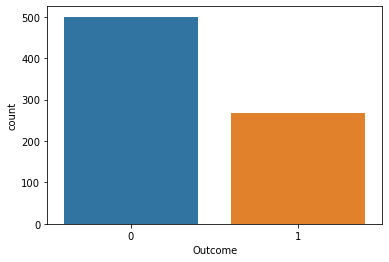

In [66]:
sns.countplot(df['Outcome'])

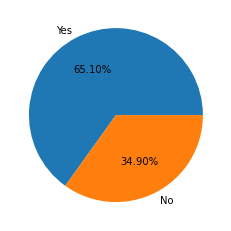

In [67]:
d1=df['Outcome'].value_counts()
bo=['Yes','No']
plt.pie(d1,labels=bo,autopct='%.2f%%')
plt.show()

Represent Glucose vs Blood Pressure on a scatterchart based on Outcome

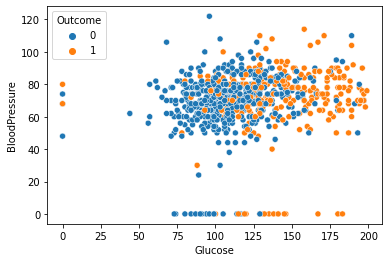

In [68]:
sns.scatterplot(x=df['Glucose'],y=df['BloodPressure'],hue=df['Outcome'])
plt.show()

Represent Blood Pressure vs Insulin on a scatterchart based on Outcome

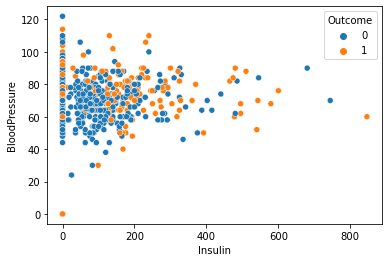

In [69]:
sns.scatterplot(x=df['Insulin'],y=df['BloodPressure'],hue=df['Outcome'])
plt.show()

Represent SkinThickness vs BMI on a scatterchart based on Outcome

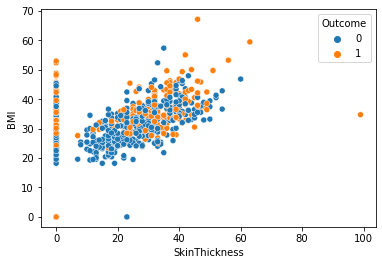

In [70]:
sns.scatterplot(x=df['SkinThickness'],y=df['BMI'],hue=df['Outcome'])
plt.show()

Replace all the 0 values present in Glucose, BloodPressure, SkinThickness, Insulin and BMI columns with their mean respectively

In [71]:
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].mean(),inplace=True)
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)

Considering all the columns as independent features and the 'Outcome' column as dependent feature, split the dataset into training and testing dataset with test size 25%

In [72]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [73]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [74]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [75]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
491,2,89.0,90.0,30.000000,79.799479,33.5,0.292,42
485,0,135.0,68.0,42.000000,250.000000,42.3,0.365,24
421,2,94.0,68.0,18.000000,76.000000,26.0,0.561,21
476,2,105.0,80.0,45.000000,191.000000,33.7,0.711,29
639,1,100.0,74.0,12.000000,46.000000,19.5,0.149,28
...,...,...,...,...,...,...,...,...
375,12,140.0,82.0,43.000000,325.000000,39.2,0.528,58
224,1,100.0,66.0,15.000000,56.000000,23.6,0.666,26
319,6,194.0,78.0,20.536458,79.799479,23.5,0.129,59
735,4,95.0,60.0,32.000000,79.799479,35.4,0.284,28


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [77]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(192, 8)
(192,)
(576, 8)
(576,)


Apply Decision Tree classifier and predict the 'Outcome' column for testing dataset

In [78]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [79]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)

In [80]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [81]:
dt.score(x_train,y_train)

0.8402777777777778

In [82]:
dt.score(x_test,y_test)

0.7552083333333334

In [83]:
y_pred=dt.predict(x_test)

In [84]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
print(confusion_matrix(y_test,y_pred))

[[98 16]
 [31 47]]


In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       129
           1       0.60      0.75      0.67        63

    accuracy                           0.76       192
   macro avg       0.73      0.75      0.74       192
weighted avg       0.78      0.76      0.76       192



In [90]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
RFc=RandomForestClassifier(n_estimators=15)

In [93]:
RFc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=15)

In [94]:
RFc.score(x_train,y_train)

0.9930555555555556

In [95]:
RFc.score(x_test,y_test)

0.7552083333333334

In [96]:
RF_pred=RFc.predict(x_test)

In [98]:
RF_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [99]:
print(classification_report(RF_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       125
           1       0.63      0.73      0.68        67

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.77      0.76      0.76       192



In [100]:
print(confusion_matrix(y_test,RF_pred))

[[96 18]
 [29 49]]
